# 1D constant coefficient advection with Fourier spectral method

We solve the 1-dimensional advection equation with constant coefficient and periodic boundary conditions

$$
\begin{align}
    & \frac{\partial}{\partial t} f(t,x) - v \frac{\partial}{\partial t} f(t,x) = 0 \\[3mm]
    & f(t,a) = f(t,b) \qquad \forall \; t\in [0,T]
\end{align}
$$

See the [sixth exercise sheet](http://www-m16.ma.tum.de/foswiki/pub/M16/Allgemeines/CompPlasmaPhys22/exercise06.pdf) for details.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#  Set the parameters
v  = 2
a  = 0
b  = 2 * np.pi
dt = 0.01
T  = 1.0
L  = b-a

N_timesteps = int(T/dt)
time_vec    = np.linspace(0,T,N_timesteps)

#N = 400


sigma  = 0.2
f0     = lambda x : np.exp( - (x - (a+b)/2)**2 / (2*sigma**2) ) / np.sqrt( 2*np.pi*sigma**2 )
f_ana = lambda t, x : f0((x - v*t)%L)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

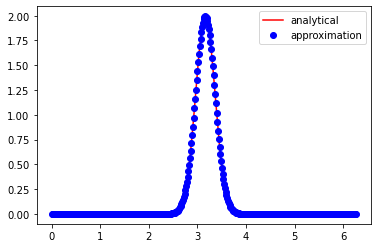

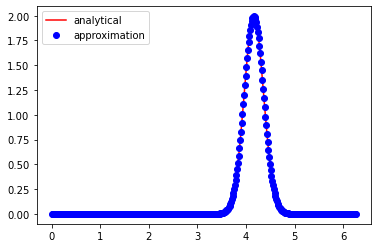

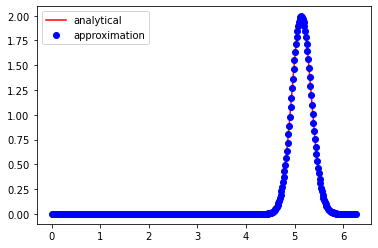

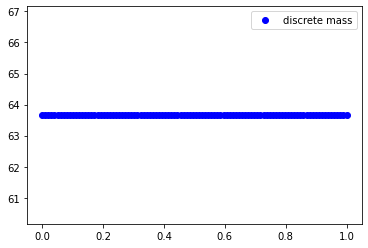

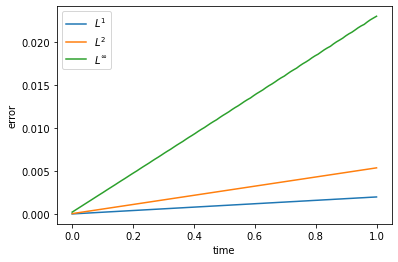

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

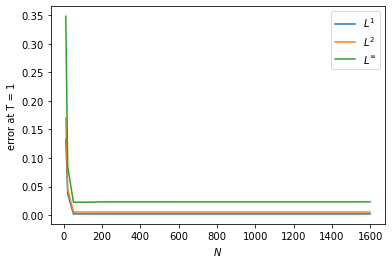

In [13]:


N_vec = [10, 20, 50, 100, 200, 400, 800, 1600]

L1_end_arr  = np.empty( len(N_vec) )
L2_end_arr  = np.empty( len(N_vec) )
Linf_end_arr = np.empty( len(N_vec) )

for j,N in enumerate(N_vec):
    
    # generate the grid
    Omega = np.linspace(a, b, N+1)[:-1]
    h     = Omega[1] - Omega[0]
    
    # Compute the initial condition
    f0_vec = f0(Omega) 

    # Create arrays to store data
    discrete_mass = np.empty( N_timesteps, dtype=float)

    max_approx = np.empty( N_timesteps, dtype=float)
    max_ana    = np.empty( N_timesteps, dtype=float)

    L1_arr   = np.empty( N_timesteps, dtype=float)
    L2_arr   = np.empty( N_timesteps, dtype=float)
    Linf_arr = np.empty( N_timesteps, dtype=float)

    # FFT the initial condition
    f_hat = np.fft.fftshift( np.fft.fft(f0_vec) )

    plt.figure()

    #print(np.arange(-N/2, N/2))
    #print(f_hat)

    for k in range(N_timesteps):
        f_hat = (np.ones(N) - 1j * dt * v * 1 * (np.arange(-N/2, N/2)) * np.pi / L) / (np.ones(N) + 1j * dt * v * 1 * (np.arange(-N/2, N/2)) * np.pi / L) * f_hat 
        #f_vec = abs(np.fft.ifft(np.fft.fftshift(f_hat)))
        f_vec = (np.fft.ifft(np.fft.fftshift(f_hat))).real

        f_ana_vec = f_ana((k+1)*dt, Omega)

        if (k == 0 or k == int(N_timesteps/2) or k == int(N_timesteps-1)) and (N == 400):
            plt.figure()
            plt.plot(Omega, f_ana_vec, 'r-', label='analytical')
            plt.plot(Omega, f_vec    , 'ob', label='approximation')
            plt.legend()
            plt.show()

        discrete_mass[k] = np.sum( f_vec )

        L1_arr[k]   = np.sum( np.abs( f_vec - f_ana_vec ) )/N
        L2_arr[k]   = np.sqrt( np.sum( np.abs( f_vec - f_ana_vec )**2 )/N )
        Linf_arr[k] = np.max( np.abs( f_vec - f_ana_vec ) )
    
    L1_end_arr[j]  = L1_arr[-1]
    L2_end_arr[j]  = L2_arr[-1]
    Linf_end_arr[j] = Linf_arr[-1]
    
    
    if N == (400):
        plt.figure()
        plt.plot(time_vec, discrete_mass, 'ob', label='discrete mass')
        plt.legend()
        plt.show()

        plt.figure()
        plt.plot(time_vec, L1_arr, label='$L^1$')
        plt.plot(time_vec, L2_arr, label='$L^2$')
        plt.plot(time_vec, Linf_arr, label='$L^\infty$')
        plt.xlabel('time')
        plt.ylabel('error')
        plt.legend()
        plt.show()

plt.figure()
plt.plot(N_vec, L1_end_arr, label='$L^1$')
plt.plot(N_vec, L2_end_arr, label='$L^2$')
plt.plot(N_vec, Linf_end_arr, label='$L^\infty$')
plt.xlabel('$N$')
plt.ylabel('error at T = 1')
plt.legend()
plt.show()


For updating, the Crank–Nicolson method is used for time discretization. It conserves energy and is stable for the given problem at the same time.

For N = 400 (when round-off error plays the largest role), the error increases linearly over time.

We can observe, that the error at time T doesn't depend on the number of grid points N for larger N. It is explained by very quick convergence to round off errors, as we saw in the lectures.